In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
folders = os.listdir('/content/drive/MyDrive/Datasets/Cat_Dog_Horse_Human_Dataset/')

In [6]:
for f in folders:
  path = '/content/drive/MyDrive/Datasets/Cat_Dog_Horse_Human_Dataset/' + f

  print(f+" " + str(len(os.listdir(path))))

cats 181
horses 181
dogs 181
humans 181


In [11]:
import keras.utils as image
import matplotlib.pyplot as plt

In [12]:
sample_image = '/content/drive/MyDrive/Datasets/Cat_Dog_Horse_Human_Dataset/dogs/dog.1.jpg'
img = image.load_img(sample_image)
print(type(img))

<class 'PIL.JpegImagePlugin.JpegImageFile'>


In [13]:
img = image.img_to_array(img)/255.0
print(img.shape)

(499, 327, 3)


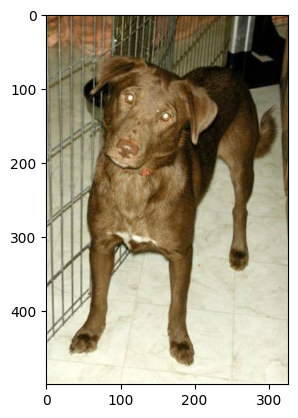

In [14]:
plt.imshow(img)
plt.show()

In [15]:
from keras.preprocessing.image import ImageDataGenerator

In [17]:
train_gen = ImageDataGenerator(rescale = 1.0/255)

train_generator = train_gen.flow_from_directory('/content/drive/MyDrive/Datasets/Cat_Dog_Horse_Human_Dataset/',
                                                target_size = (224, 224), 
                                                batch_size = 32, 
                                                class_mode = 'categorical')

Found 724 images belonging to 4 classes.


In [18]:
for x, y in train_generator:
  x, y = train_generator.next()
  print(x.shape, y.shape)
  break

(32, 224, 224, 3) (32, 4)


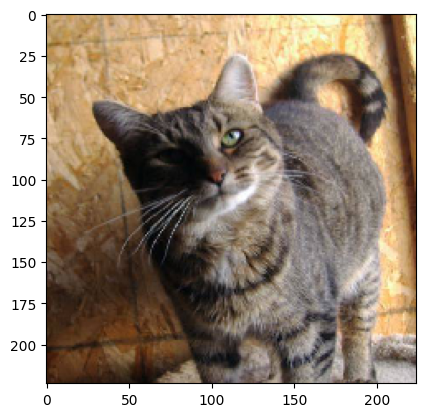

[1. 0. 0. 0.]


In [19]:
plt.imshow(x[10])
plt.show()
print(y[10])

In [20]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import numpy as np

In [21]:
base_model = ResNet50(weights = 'imagenet', include_top = False, input_shape=(224, 224, 3))
base_model.summary()

94765736/94765736 [==============================] - 1s 0us/step
Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                          

In [22]:
for layer in base_model.layers:
  layer.trainable = False

In [23]:
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(4, activation = 'softmax')(x)

In [24]:
model = Model(inputs = base_model.input, outputs = x)

In [25]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [26]:
from tensorflow.keras import optimizers
model.compile(loss = 'categorical_crossentropy', optimizer = "adam", metrics=["accuracy"])

In [27]:
history = model.fit_generator(
    train_generator,
    epochs = 100, 
    steps_per_epoch = 7
  )

<ipython-input-27-3a666f524d9b>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
7/7 [==============================] - 50s 6s/step - loss: 1.4875 - accuracy: 0.2264
Epoch 2/100
7/7 [==============================] - 37s 5s/step - loss: 1.4417 - accuracy: 0.2455
Epoch 3/100
7/7 [==============================] - 22s 3s/step - loss: 1.3759 - accuracy: 0.2689
Epoch 4/100
7/7 [==============================] - 15s 2s/step - loss: 1.3518 - accuracy: 0.3482
Epoch 5/100
7/7 [==============================] - 9s 1s/step - loss: 1.3315 - accuracy: 0.4057
Epoch 6/100
7/7 [==============================] - 8s 1s/step - loss: 1.3444 - accuracy: 0.3348
Epoch 7/100
7/7 [==============================] - 4s 694ms/step - loss: 1.3203 - accuracy: 0.3616
Epoch 8/100
7/7 [==============================] - 4s 454ms/step - loss: 1.3105 - accuracy: 0.3393
Epoch 9/100
7/7 [==============================] - 2s 312ms/step - loss: 1.3168 - accuracy: 0.4107
Epoch 10/100
7/7 [==============================] - 2s 370ms/step - loss: 1.2886 - accuracy: 0.4152
Epoch 11/100
7/7 [=====

In [28]:
for i, layer in enumerate(base_model.layers):
  print(i, layer.name)

0 input_1
1 conv1_pad
2 conv1_conv
3 conv1_bn
4 conv1_relu
5 pool1_pad
6 pool1_pool
7 conv2_block1_1_conv
8 conv2_block1_1_bn
9 conv2_block1_1_relu
10 conv2_block1_2_conv
11 conv2_block1_2_bn
12 conv2_block1_2_relu
13 conv2_block1_0_conv
14 conv2_block1_3_conv
15 conv2_block1_0_bn
16 conv2_block1_3_bn
17 conv2_block1_add
18 conv2_block1_out
19 conv2_block2_1_conv
20 conv2_block2_1_bn
21 conv2_block2_1_relu
22 conv2_block2_2_conv
23 conv2_block2_2_bn
24 conv2_block2_2_relu
25 conv2_block2_3_conv
26 conv2_block2_3_bn
27 conv2_block2_add
28 conv2_block2_out
29 conv2_block3_1_conv
30 conv2_block3_1_bn
31 conv2_block3_1_relu
32 conv2_block3_2_conv
33 conv2_block3_2_bn
34 conv2_block3_2_relu
35 conv2_block3_3_conv
36 conv2_block3_3_bn
37 conv2_block3_add
38 conv2_block3_out
39 conv3_block1_1_conv
40 conv3_block1_1_bn
41 conv3_block1_1_relu
42 conv3_block1_2_conv
43 conv3_block1_2_bn
44 conv3_block1_2_relu
45 conv3_block1_0_conv
46 conv3_block1_3_conv
47 conv3_block1_0_bn
48 conv3_block1_3_bn